In [1]:
# import libraries
import pandas as pd
import numpy as np

### load the dataset

In [2]:
df=pd.read_csv("penguins_size.csv")
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### visualization

1) univariate analysis

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

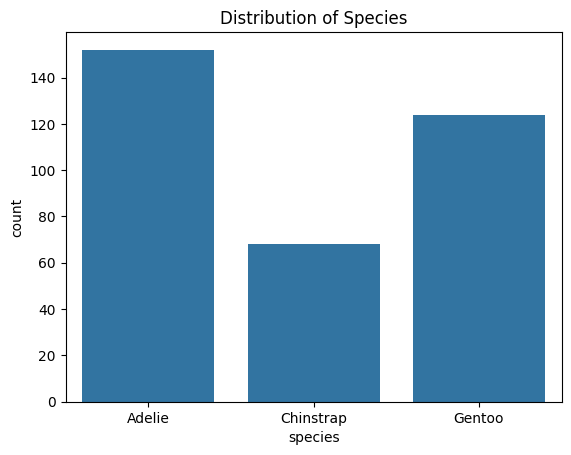

In [5]:
sns.countplot(data=df, x='species')
plt.title('Distribution of Species')
plt.show()

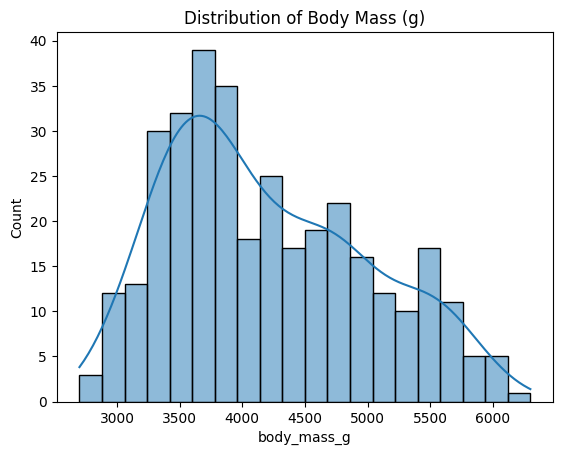

In [6]:
sns.histplot(data=df, x='body_mass_g', bins=20, kde=True)
plt.title('Distribution of Body Mass (g)')
plt.show()

2) Bi variate analysis

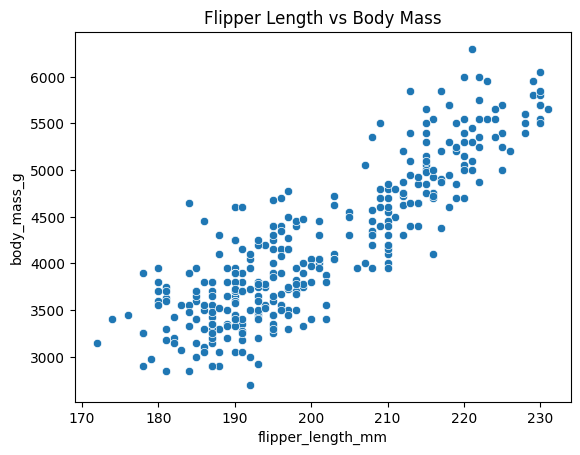

In [7]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g')
plt.title('Flipper Length vs Body Mass')
plt.show()

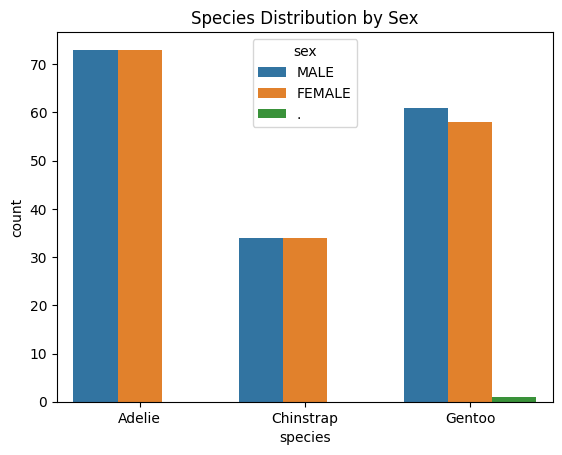

In [8]:
sns.countplot(data=df, x='species', hue='sex')
plt.title('Species Distribution by Sex')
plt.show()

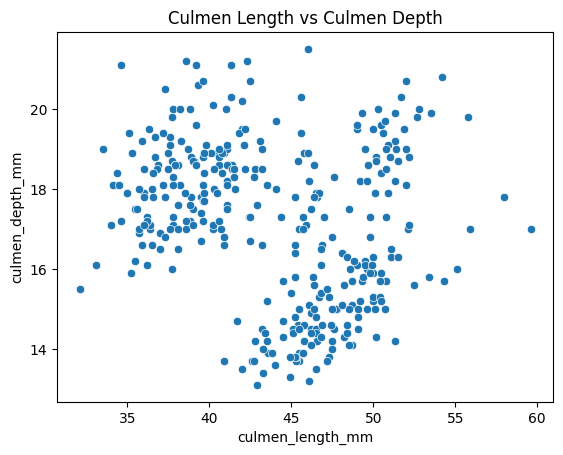

In [9]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm')
plt.title('Culmen Length vs Culmen Depth')
plt.show()

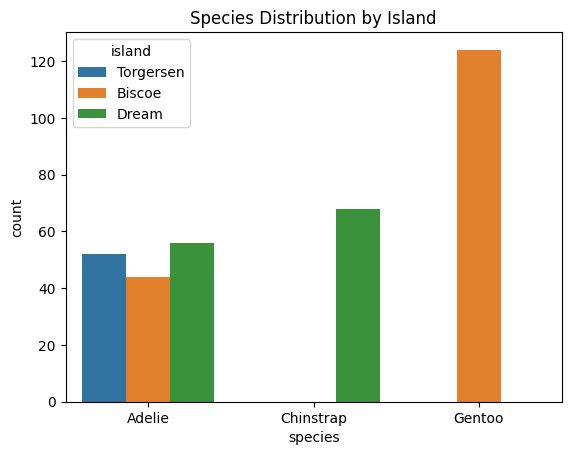

In [10]:
sns.countplot(data=df, x='species', hue='island')
plt.title('Species Distribution by Island')
plt.show()

3) multivariate analysis

In [ ]:
sns.pairplot(data=df, hue="species")
plt.title('Pairplot of Peguin Data')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,)
plt.title("Correlation matrix")
plt.show()

## perform descriptive stastistic on the dataset

In [ ]:
df.describe().T

## 5. Check for Missing values and deal with them.

In [ ]:
df.isnull().sum()

In [ ]:
df["sex"].unique()

In [ ]:
df["sex"].replace(".",np.nan,inplace=True)

In [ ]:
df["sex"].unique()

In [ ]:
df.sex.isnull().sum()

In [ ]:
df["sex"].fillna(df["sex"].mode().iloc[0], inplace=True)


In [ ]:
df["sex"].unique()

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df

In [ ]:
df.shape

## 6. Find the outliers and replace them outliers

In [ ]:
df.boxplot()

## 7. Check for Categorical columns and perform encoding.

In [ ]:
df.head()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [ ]:
df[["species","island","sex"]]=oe.fit_transform(df[["species","island","sex"]])

In [ ]:
df.head()

## 9.  Split the data into dependent and independent variables.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.iloc[:,1:] #independent variable

x

In [ ]:
y=df.iloc[:,0] # dependent variable and target
y

## 10. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
print(x)

## 11. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=6)

## 12 &13 build and train the model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr_ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
print("classification report of logistic regression is", classification_report(ytest,lr_ypred))
print("accuracy of logistic regression is", accuracy_score(ytest,lr_ypred))
print("confusion matrix of logistic regression is", confusion_matrix(ytest,lr_ypred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn_ypred=knn.predict(xtest)

In [ ]:
print("classification report of KNN is", classification_report(ytest,knn_ypred))
print("accuracy of KNN is", accuracy_score(ytest,knn_ypred))
print("confusion matrix of KNN is", confusion_matrix(ytest,knn_ypred))

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
svm_ypred=svm.predict(xtest)

In [ ]:
print("classification report of SVM is", classification_report(ytest,svm_ypred))
print("accuracy of SVM is", accuracy_score(ytest,svm_ypred))
print("confusion matrix of SVM is", confusion_matrix(ytest,svm_ypred))